In [62]:
from evaluate import evaluate,getTimes
from getdata import get_alldata

In [63]:
stanard_anglist=get_alldata("./jsonfile/standard/")#获取标准动作
now_anglist,now_xy_list,W=get_alldata("./jsonfile/now/",isRunning=True)#获取当前动作信息

3.0

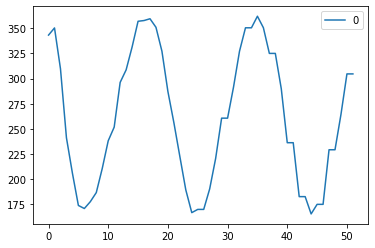

In [64]:
times = getTimes(now_xy_list,0,"test")#计算运动个数 由于采用头部计数 传入0 头部的X即为各个List的第一个值
times

[2.246939556297493,
 2.613691374321452,
 2.230905575787457,
 2.781549093225316,
 0.8757956268218335,
 0.022520847267431976,
 1.0344056440983582,
 0.04765244508613964]

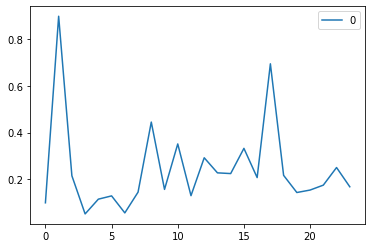

In [65]:
proposal=evaluate(stanard_anglist,now_anglist,int(times))
proposal

In [66]:
#运动次数越多误差越大，做平均处理
standard_proposal=[x/times for x in proposal]
standard_proposal

[0.7489798520991644,
 0.8712304581071506,
 0.7436351919291524,
 0.9271830310751054,
 0.29193187560727785,
 0.007506949089143992,
 0.3448018813661194,
 0.015884148362046546]

## 各向量表征部位
### 右肩臂
### 右肘
### 左肩臂
### 左肘
### 右胯
### 右膝
### 左胯
### 左膝

In [57]:
import time
import json
time.time()

1628269233.6175206

In [87]:
def get_advice(proposal,times):
    standard_proposal=[x/times for x in proposal]
    if max(standard_proposal)<1.5:
        #print("动作标准，请继续保持")
        return "动作标准，请继续保持"
    elif  max(standard_proposal[0:4])>2.5:
        print("手弯曲程度较大，未完全上单杠")
    elif max(standard_proposal[0:4])>1.5:
        print("基本标准,建议手不要弯曲")
    elif max(standard_proposal[4:8])>1.5:
        print("基本标准,腿伸直一点更好")

In [85]:
get_advice(proposal,times)

动作标准，请继续保持


In [112]:
with open('result.json','r',encoding='utf8')as fp:
    result_json_data = json.load(fp)
    print(result_json_data)

{'message': 'success', 'resultlist': [{'id': '1', 'time': '1628261972', 'num': '3', 'advice': '动作标准，继续保持', 'energy': '100'}, {'id': '2', 'time': '1628261973', 'num': '5', 'advice': '基本标准,建议手不要弯曲', 'energy': '200'}, {'id': '3', 'time': '1628261975', 'num': '5', 'advice': '手弯曲程度较大，未完全上单杠', 'energy': '200'}, {'id': '4', 'time': '1628261979', 'num': '5', 'advice': '基本标准,腿伸直一点更好', 'energy': '200'}, {'id': 5, 'time': '1628261979', 'num': '5', 'advice': '基本标准,腿伸直一点更好', 'energy': '200'}]}


In [113]:
new_result={}
new_result.update(id=str(result_json_data["resultlist"][-1]["id"]+1),
                  time=str(int(time.time())),
                  num=str(times),
                  advice=get_advice(proposal,times),
                  energy=str(W))
new_result

{'id': '6',
 'time': '1628270888',
 'num': '3.0',
 'advice': '动作标准，请继续保持',
 'energy': '94.513671875'}

In [114]:
result_json_data["resultlist"].append(new_result)
result_json_data

{'message': 'success',
 'resultlist': [{'id': '1',
   'time': '1628261972',
   'num': '3',
   'advice': '动作标准，继续保持',
   'energy': '100'},
  {'id': '2',
   'time': '1628261973',
   'num': '5',
   'advice': '基本标准,建议手不要弯曲',
   'energy': '200'},
  {'id': '3',
   'time': '1628261975',
   'num': '5',
   'advice': '手弯曲程度较大，未完全上单杠',
   'energy': '200'},
  {'id': '4',
   'time': '1628261979',
   'num': '5',
   'advice': '基本标准,腿伸直一点更好',
   'energy': '200'},
  {'id': 5,
   'time': '1628261979',
   'num': '5',
   'advice': '基本标准,腿伸直一点更好',
   'energy': '200'},
  {'id': '6',
   'time': '1628270888',
   'num': '3.0',
   'advice': '动作标准，请继续保持',
   'energy': '94.513671875'}]}

In [117]:
with open("result.json","w",encoding='utf-8') as f:
    json.dump(result_json_data,f,ensure_ascii=False)
    print("加载入文件完成...")

加载入文件完成...


In [ ]:
#综合上述代码
from evaluate import evaluate,getTimes
from getdata import get_alldata

stanard_anglist=get_alldata("./jsonfile/standard/")#获取标准动作
now_anglist,now_xy_list,W=get_alldata("./jsonfile/now/",isRunning=True)#获取当前动作信息
times = getTimes(now_xy_list,0,"test")#计算运动个数 由于采用头部计数 传入0 头部的X即为各个List的第一个值
proposal=evaluate(stanard_anglist,now_anglist,int(times))

import time
import json

def get_advice(proposal,times):
    standard_proposal=[x/times for x in proposal]
    if max(standard_proposal)<1.5:
        #print("动作标准，请继续保持")
        return "动作标准，请继续保持"
    elif  max(standard_proposal[0:4])>2.5:
        print("手弯曲程度较大，未完全上单杠")
    elif max(standard_proposal[0:4])>1.5:
        print("基本标准,建议手不要弯曲")
    elif max(standard_proposal[4:8])>1.5:
        print("基本标准,腿伸直一点更好")

def savereuslt(filename,times,proposal,W):
    with open(filename','r',encoding='utf8')as fp:
        result_json_data = json.load(fp)
        #print(result_json_data)
    new_result={}
    new_result.update(id=str(result_json_data["resultlist"][-1]["id"]+1),
                      time=str(int(time.time())),
                      num=str(times),
                      advice=get_advice(proposal,times),
                      energy=str(W))

    result_json_data["resultlist"].append(new_result)

    with open(filename,"w",encoding='utf-8') as f:
        json.dump(result_json_data,f,ensure_ascii=False)
        #print("加载入文件完成...")
              
savereuslt("result.json",times,proposal,W)       